## Módulo 01 - Introdução

In [55]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
FILE = '../data/BancoDeDados.csv'

In [3]:
df = pd.read_csv(FILE)

In [4]:
df.head(2)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [5]:
df.shape

(116581, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [7]:
def plot_perc(col, df, title):
    g = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    g.set_title(title, fontsize=15)
    g.set_xlabel(col, fontsize=10)
    g.set_ylabel('Quantidade', fontsize=10)
    # g.set_xticks(ticks=g.get_xticklabels())
    # g.get_yticklabels()
    g.set_xticklabels(labels=g.get_xticklabels(), rotation=45)

    sizes = list()
    for p in g.patches:
    #     print(p)
        height = p.get_height()
        sizes.append(height)
    #     print(p.get_x()), print(p.get_width())
        g.text(x=p.get_x()+p.get_width()/2, y=height+200, s='{:.0f}%'.format(height/len(df)*100), ha='center', va='bottom', fontsize=10)

    g.set_ylim(0, max(sizes) * 1.1); # Definindo o intervalo de y => mínimo=0, máximo = 10% a mais do valor máximo de y

    # g.text
    #     x => posição x onde o texto será colocado. No caso acima, foi utilizada a posição inicial do x (p.get_x()) + metade da largura da barra,
    #     para que o texto ficasse bem no meio da barrinha
    #     y => posição y onde o texto será colocado. No caso acima, foi utilizada a própria altura da barra, acrescido de 200 para que o texto não
    #     ficasse muito junto
    #     s => é o próprio conteúdo do texto, onde calculamos a representatividade de cada estado

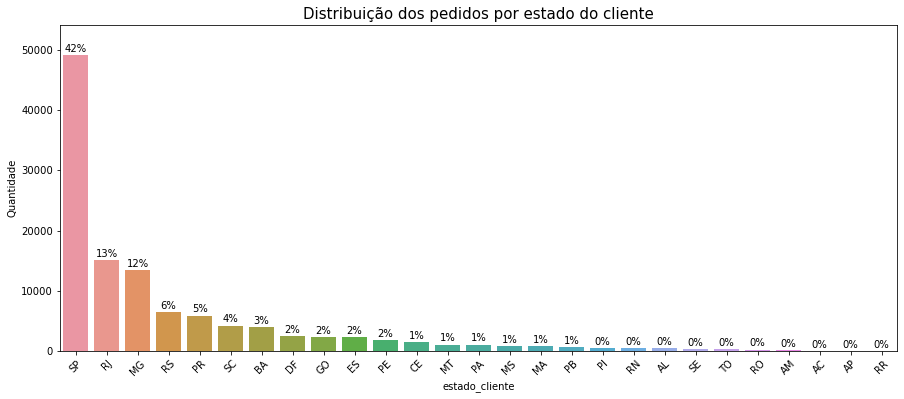

In [8]:
plot_perc(col='estado_cliente', df=df, title='Distribuição dos pedidos por estado do cliente')

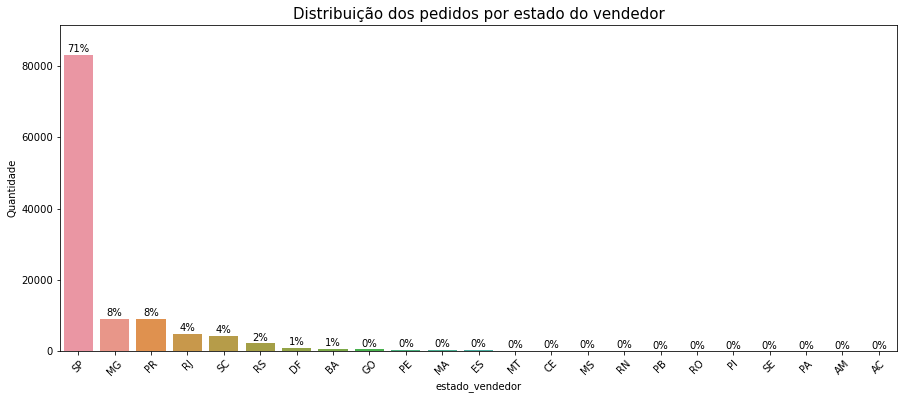

In [9]:
plot_perc(col='estado_vendedor', df=df, title='Distribuição dos pedidos por estado do vendedor')

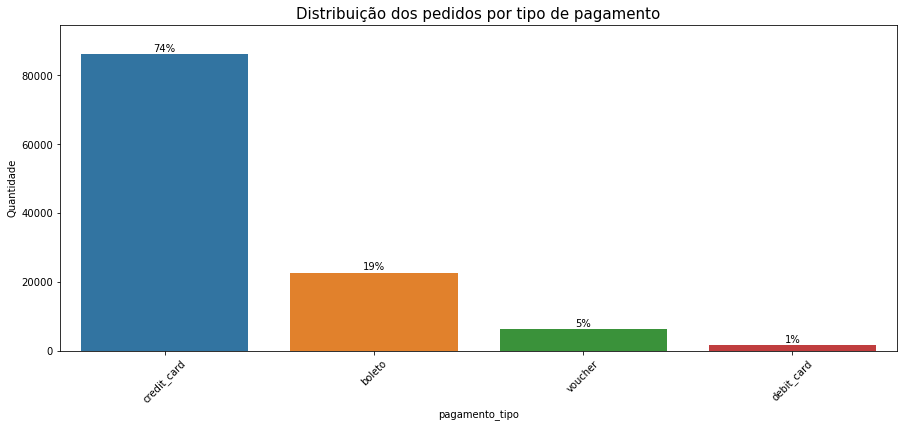

In [10]:
plot_perc(col='pagamento_tipo', df=df, title='Distribuição dos pedidos por tipo de pagamento')

Vimos que grande parte dos pedidos são de clientes do Sudeste, com uma concentração em SP. Também percebemos que +70% dos pedidos são de vendedores de SP. 74% dos pedidos são pagos com Cartão de Crédito e 19% com boleto.

Nesta aula, aprendemos:

- Quais as principais etapas em um problema de segmentação;
- Que tipo de dados vamos precisar obter;
- Como a análise exploratória pode ajudar a identificar insights;
- Como adicionar textos informativos em gráficos.

## Módulo 02 - Modelos RFM

- ### Recência (R)
     Há quantos dias foi a última compra desse cliente?

- ### Frequência (F)
    Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?

- ### Monetaridade (M)
    Quanto esse cliente já gastou em dinheiro na sua empresa?

#### Analisando as duplicidades

In [22]:
df['id_pedido'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
6d58638e32674bebee793a47ac4cbadc    24
                                    ..
ef1af042323731907ad5d9feea27fc61     1
67e5eba68c1f19de1a6cb6dd510deaa7     1
3ce1b0c541f9f11f10e841355e9caa7e     1
eca79ed411acb63a03e097fa18411797     1
79af690e1f308a4aa1052a6fc4fbc908     1
Name: id_pedido, Length: 97255, dtype: int64

In [25]:
df[df['id_pedido'] == '895ab968e7bb0d5659d16cd74cd1650c'].sort_values('pagamento_sequencial')

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
21348,21348,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,1,voucher,1,2.61,5,utilidades_domesticas,housewares,89217,joinville,SC
19544,19544,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,2,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,1,voucher,1,2.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
19523,19523,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,1,voucher,1,2.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
19529,19529,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,2,voucher,1,2.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
21354,21354,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,2,voucher,1,2.61,5,utilidades_domesticas,housewares,89217,joinville,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,19539,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,20,voucher,1,4.61,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
21364,21364,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,20,voucher,1,4.61,5,utilidades_domesticas,housewares,89217,joinville,SC
19528,19528,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,1,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,21,voucher,1,0.28,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ
19549,19549,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,2,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,822166ed1e47908f7cfb49946d03c726,12.99,23.21,21,voucher,1,0.28,5,cama_mesa_banho,bed_bath_table,25803,tres rios,RJ


In [37]:
df[df.duplicated(subset=['id_pedido', 'item_id', 'pagamento_sequencial'], keep=False)].head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
546,546,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
547,547,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
705,705,f5c36ac199073a62861ebda86e8cc725,ca994abc57b0bd7981d91d0061b3d8d6,1,90430,porto alegre,RS,70c77e51e0f179d75a64a614135afb6a,delivered,2017-07-13 21:03:44,2017-07-15 03:34:37,2017-07-25 19:35:45,2017-08-25 19:41:53,2017-08-14 00:00:00,7c67e1448b00f6e969d365cea6b010ab,209.99,53.48,1,boleto,1,263.47,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
706,706,f5c36ac199073a62861ebda86e8cc725,ca994abc57b0bd7981d91d0061b3d8d6,1,90430,porto alegre,RS,70c77e51e0f179d75a64a614135afb6a,delivered,2017-07-13 21:03:44,2017-07-15 03:34:37,2017-07-25 19:35:45,2017-08-25 19:41:53,2017-08-14 00:00:00,7c67e1448b00f6e969d365cea6b010ab,209.99,53.48,1,boleto,1,263.47,2,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
754,754,7e2d8e10c5c9339ad1492ad76452465f,a982bd0fec12d781fecd9f1e17cb81bf,1,48967,nucleo residencial pilar,BA,cb5b7fb63c0add7098c025cb737df02e,delivered,2018-02-25 17:37:04,2018-02-27 04:31:06,2018-03-01 21:36:54,2018-03-19 16:46:35,2018-04-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,116.99,17.26,1,boleto,1,134.25,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [38]:
df[df['id_pedido'] == '5040757d4e06a4be96d3827b860b4e7c']

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
546,546,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
547,547,0db6ca6d0557c5b2358816e1ed450384,8746f1ba2e19bcf8bc03a946a0923d78,1,83511,almirante tamandare,PR,5040757d4e06a4be96d3827b860b4e7c,delivered,2017-10-20 23:02:08,2017-10-20 23:14:10,2017-10-27 22:22:26,2017-11-06 22:24:38,2017-11-21 00:00:00,7c67e1448b00f6e969d365cea6b010ab,196.99,56.66,1,credit_card,10,253.65,5,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


Conclusão: Pela análise, aparemente não existe uma coluna que nos permita concluir se há duplicidades equivocadas ou se as duplicidades referem-se à quantidade comprada de um mesmo item. Sendo assim, vamos assumir que as duplicidades são válidas e representam a quantidade comprada.

In [39]:
# Vamos criar uma base apenas com as variáveis que desejamos para criar o modelo RFM
df_rfm = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']].copy()

In [40]:
df_rfm.head(2)

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99


In [44]:
# Agrupando os clientes pela última data que compraram
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'data_max_compra']
df_compra['data_max_compra'] = pd.to_datetime(df_compra['data_max_compra'])

In [45]:
df_compra.head()

,id_unico_cliente,data_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [48]:
# Calculando a Recência
df_compra['recencia'] = (df_compra['data_max_compra'].max() - df_compra['data_max_compra']).dt.days
# Considerando como data referência a data máxima da coluna 'data_max_compra'

In [50]:
df_compra.head()

,id_unico_cliente,data_max_compra,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [51]:
df_rfm.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [52]:
# Vamos criar um terceiro dataframe juntando os outros dois
df_rfm_2 = pd.merge(df_rfm, df_compra[['id_unico_cliente', 'recencia']])

In [53]:
df_rfm_2.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


Vamos agora determinar a quantidade ideal de clusters.

In [77]:
def calcula_wcss(data):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
#         data['cluster'] = kmeans.labels_ => Não faz sentido atribuir aqui, pois sempre será o label de k=10
        wcss.append(kmeans.inertia_)
    return wcss

WCSS is the sum of squared distance between each point and the centroid in a cluster.

In [78]:
# A princípio, vamos clusterizar apenas a coluna 'recencia'. Para isso, criamos um df com apenas essa coluna.
df_recencia = df_rfm_2[['recencia']]

In [79]:
df_recencia.head(2)

,recencia
0,474
1,298


In [80]:
inertia = calcula_wcss(df_recencia)

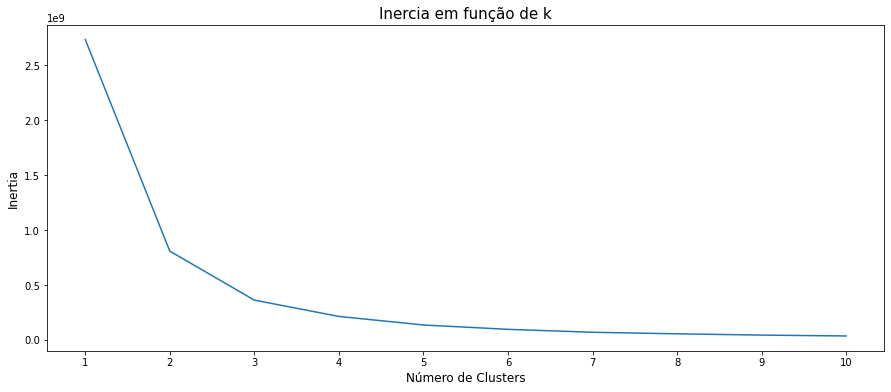

In [86]:
# Vamos plotar o gráfico da inércia para definir o k a partir do Elbow (Cotovelo)
plt.figure()
plt.plot(range(1,len(inertia)+1), inertia)
plt.xlabel('Número de Clusters', fontsize=12) # O plt por padrão utiliza para o eixo x o próprio index
plt.xticks(range(1,len(inertia)+1))
plt.ylabel('Inertia', fontsize=12)
plt.title('Inercia em função de k', fontsize=15)
plt.show()

Para saber onde de fato está o tal do cotovelo, podemos utilizar a função abaixo. A ideia é traçar uma reta do primeiro ponto do gráfico até o último e calcular a distância de cada ponto até a reta. O ponto que tiver a maior distância será o número ideal de clusters. A fórmula para calcular essas distâncias é dada por:

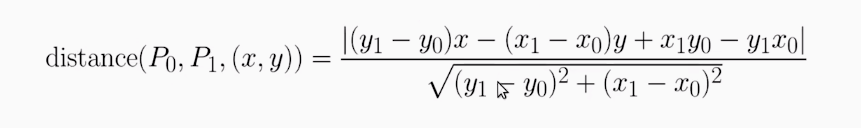

Onde:
   - P0 é o primeiro ponto
   - P1 é o último ponto
   - (x, y) são as coordenadas dos ponto para os quais queremos calcular a distância até a reta

### Sobre a Inércia (Erro Quadrático Médio Intra-Cluster)

- Funciona melhor para clusters globulares, mas é uma métrica ruim quando os clusters possuem formato irregular
- Não é uma métrica normalizada, ou seja, quanto mais dimensões você tiver, maior será o resultado
- Não leva em consideração a componente inter-cluster, ou seja, mede apenas o quão compacto estão os clusters, mas não o quanto esses clusters estão separados
- Dependendo da distribuição dos clusters, fica inviável identificar um cotovelo ("caimento" do gráfico sempre suave)

### Codificando a Regra Matemática

In [127]:
import math

In [135]:
def num_otimo_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = len(wcss), wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [136]:
n = num_otimo_clusters(inertia)

In [137]:
print(n)

4


### Exercício

Seu gestor pediu para que você identificasse de quais estados vem as compras de maior valor e também quais estados tem mais valor de frete. Para fazer isso, é preciso que você faça dois gráficos de barras novo. Como você faria essa análise?

Como o enunciado diz "as compras de maior valor", precisamos primeiro agrupar as compras por id do pedido

In [109]:
df[['id_pedido', 'preco', 'frete', 'estado_cliente']].head(2)

,id_pedido,preco,frete,estado_cliente
0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88,SP
1,c1d2b34febe9cd269e378117d6681172,112.99,24.90,PA


In [121]:
df_preco_frete = df[['id_pedido', 'preco', 'frete', 'estado_cliente']].groupby(['id_pedido', 'estado_cliente']).sum()
df_preco_frete = df_preco_frete.reset_index()

In [122]:
df_preco_frete.head()

,id_pedido,estado_cliente,preco,frete
0,00010242fe8c5a6d1ba2dd792cb16214,RJ,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,SP,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,MG,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,SP,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,SP,199.90,18.14


In [123]:
df_preco_frete['id_pedido'].value_counts().head(2)

0a0e91f265e0c09af322a473351b61d1    1
9146e206bcd61ac9fb10f3a26336a7ec    1
Name: id_pedido, dtype: int64

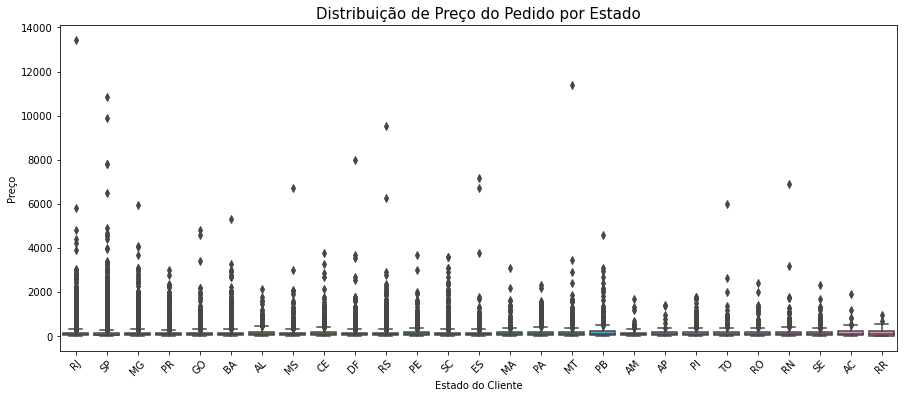

In [125]:
plt.figure()
g2 = sns.boxplot(x='estado_cliente', y='preco', data=df_preco_frete)
g2.set_title('Distribuição de Preço do Pedido por Estado', fontsize=15)
g2.set_xlabel('Estado do Cliente', fontsize=10)
g2.set_ylabel('Preço', fontsize=10)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45);

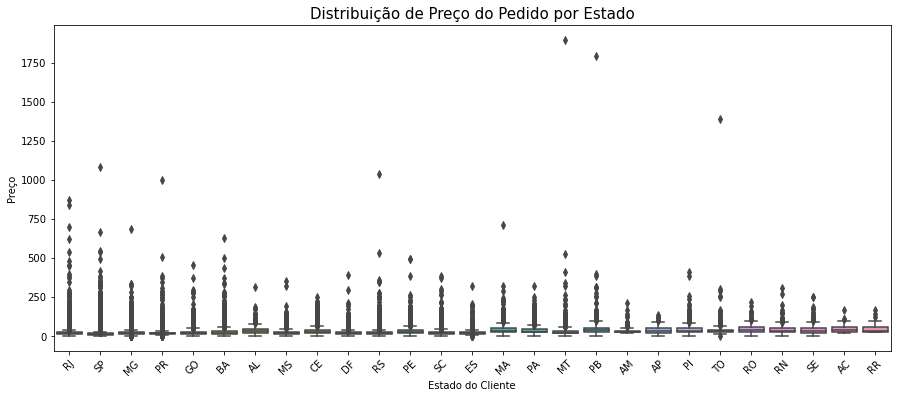

In [126]:
plt.figure()
g2 = sns.boxplot(x='estado_cliente', y='frete', data=df_preco_frete)
g2.set_title('Distribuição de Preço do Pedido por Estado', fontsize=15)
g2.set_xlabel('Estado do Cliente', fontsize=10)
g2.set_ylabel('Preço', fontsize=10)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45);

Nesta aula, aprendemos:

- Modelos RFM (recência, frequência e monetaridade);
- Como funciona o método k-means;
- Como usar a regra do cotovelo para definir o número de clusters;
- Como usar uma regra matemática para confirmar o número de clusters;